<a href="https://colab.research.google.com/github/hoonzi-s/APC/blob/main/%231%20ALK%20-%20213BTMRVP%20Inferential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# 데이터 전처리

In [6]:
data_origin = pd.read_csv('/content/drive/MyDrive/alk rvp csv.csv', index_col = 0)
data_origin.info()
data_origin.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2708 entries, 2014-09-16 to 2022-05-17
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RVP_LAB         2708 non-null   float64
 1   S.B5.213TI2804  2708 non-null   float64
 2   S.B5.213PI2806  2708 non-null   float64
dtypes: float64(3)
memory usage: 84.6+ KB


,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
count,2708.000000,2708.000000,2708.000000
mean,39.308013,133.969684,335.047833
std,3.406074,3.452283,29.851255
min,28.500000,97.606803,291.821242
25%,37.400000,131.998333,318.077753
50%,39.000000,133.436735,325.511703
75%,40.700000,136.158762,338.359004
max,98.600000,145.939417,520.512731


In [7]:
data_origin

,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
2014-09-16,35.5,136.582564,335.836740
2014-09-17,33.5,138.822292,338.164993
2014-09-18,34.4,138.079717,339.017050
2014-09-19,34.3,137.367731,335.839848
2014-09-20,35.2,137.442057,349.710404
...,...,...,...
2022-05-13,43.7,127.127323,326.187806
2022-05-14,49.9,123.287827,321.014425
2022-05-15,48.7,125.099084,332.709037
2022-05-16,51.0,122.406470,325.956086


In [41]:
data_origin.columns = ['RVP', 'T', 'P']
data = data_origin[data_origin['RVP'] < 70].sort_values(by = 'RVP')
data.reset_index(drop = True, inplace = True)
data

,RVP,T,P
0,28.5,138.416083,312.828676
1,28.5,139.732698,317.068865
2,28.8,141.019403,322.464405
3,29.8,135.484870,331.948674
4,29.8,144.009999,325.051752
...,...,...,...
2702,55.5,136.123107,480.993079
2703,57.8,133.326625,457.893074
2704,58.0,127.676712,390.946907
2705,58.0,140.224060,423.020322


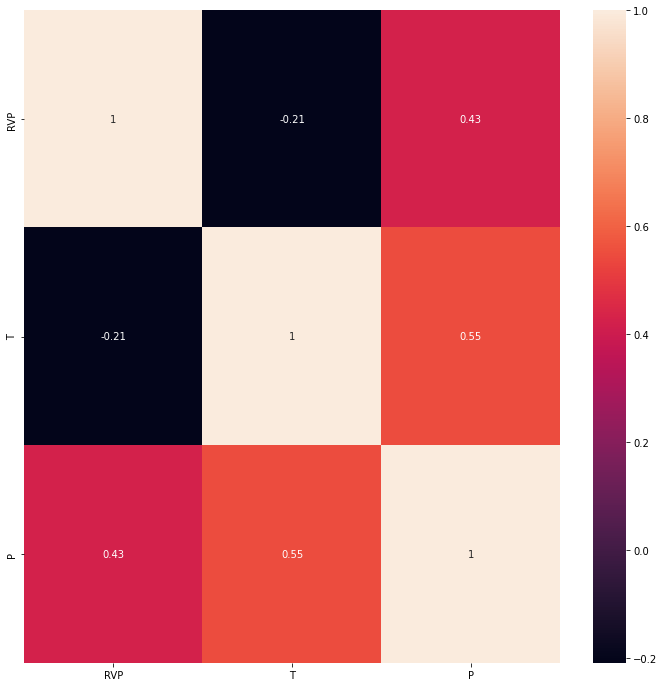

In [42]:
plt.figure(figsize = (12, 12))
sns.heatmap(data.corr(), linecolor = 'white', annot = True)
plt.show()

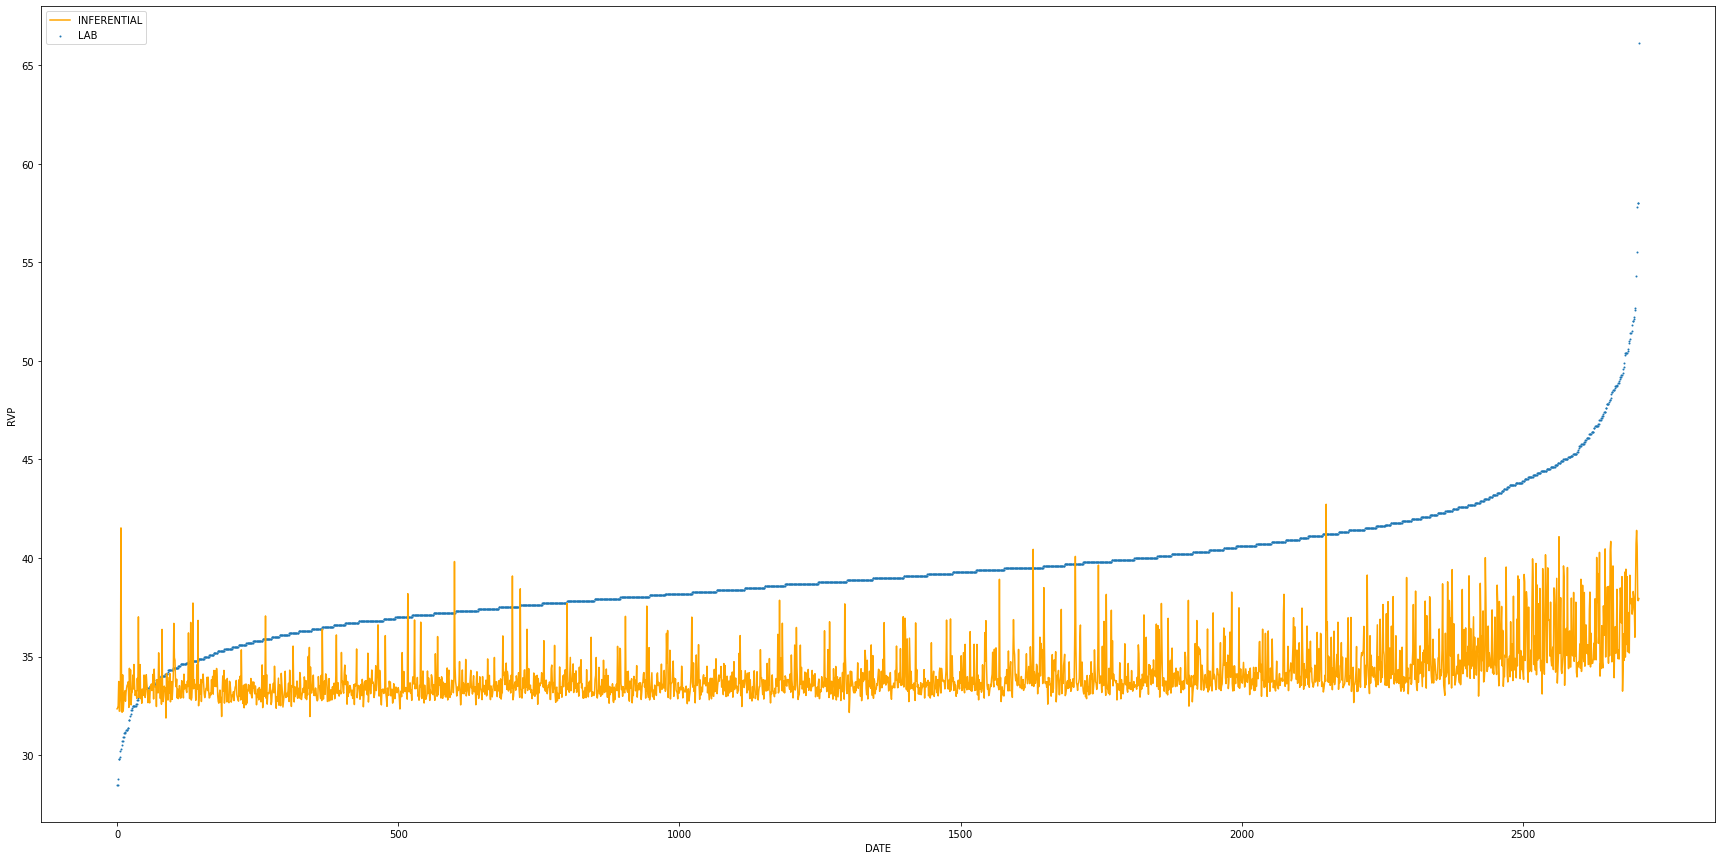

In [44]:
a1 = -0.1343
a2 = 0.0520
b = 34.671
inferential = a1 * data['T'] + a2 * data['P'] + b
length = data.shape[0]

plt.figure(figsize = (30, 15))
plt.scatter(np.arange(length), data['RVP'], s = 1, label = 'LAB')
plt.plot(np.arange(length), inferential, color='orange', label = 'INFERENTIAL')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [54]:
input = data.iloc[:, 1:]
input_log = np.log10(input)
input_log.columns = ['log_T', 'log_P']
input_log

,log_T,log_P
0,2.141187,2.495307
1,2.145298,2.501154
2,2.149279,2.508482
3,2.131891,2.521071
4,2.158393,2.511953
...,...,...
2702,2.133932,2.682139
2703,2.124917,2.660764
2704,2.106112,2.592118
2705,2.146823,2.626361


In [60]:
pf = PolynomialFeatures(include_bias = False, degree = 3)
pf.fit(input)
input_poly = pf.transform(input)
input_poly_pd = pd.DataFrame(input_poly, columns = ['T1', 'P1', 'T2', 'T1P1', 'P2', 'T3', 'T2P1', 'T1P2', 'P3'])
input_poly_log = pd.concat([input_poly_pd, input_log], axis = 1)
input_poly_log

,T1,P1,T2,T1P1,P2,T3,T2P1,T1P2,P3,log_T,log_P
0,138.416083,312.828676,19159.012088,43300.520031,97861.780465,2.651915e+06,5.993488e+06,1.354564e+07,3.061397e+07,2.141187,2.495307
1,139.732698,317.068865,19525.226918,44304.887920,100532.664835,2.728313e+06,6.190842e+06,1.404770e+07,3.187578e+07,2.145298,2.501154
2,141.019403,322.464405,19886.471881,45473.737763,103983.292685,2.804378e+06,6.412679e+06,1.466366e+07,3.353091e+07,2.149279,2.508482
3,135.484870,331.948674,18356.150107,44974.023103,110189.922303,2.486981e+06,6.093300e+06,1.492907e+07,3.657740e+07,2.131891,2.521071
4,144.009999,325.051752,20738.879841,46810.702571,105658.641738,2.986606e+06,6.741209e+06,1.521590e+07,3.434453e+07,2.158393,2.511953
...,...,...,...,...,...,...,...,...,...,...,...
2702,136.123107,480.993079,18529.500287,65474.272448,231354.342334,2.522293e+06,8.912561e+06,3.149267e+07,1.112798e+08,2.133932,2.682139
2703,133.326625,457.893074,17775.988801,61049.337978,209666.067492,2.370013e+06,8.139502e+06,2.795407e+07,9.600464e+07,2.124917,2.660764
2704,127.676712,390.946907,16301.342711,49914.815497,152839.483858,2.081302e+06,6.372960e+06,1.951404e+07,5.975212e+07,2.106112,2.592118
2705,140.224060,423.020322,19662.787031,59317.627000,178946.192487,2.757196e+06,8.317758e+06,2.509256e+07,7.569788e+07,2.146823,2.626361


In [61]:
target = data.iloc[:, 0]
target

0       28.5
1       28.5
2       28.8
3       29.8
4       29.8
        ... 
2702    55.5
2703    57.8
2704    58.0
2705    58.0
2706    66.1
Name: RVP, Length: 2707, dtype: float64

In [95]:
train_input, test_input, train_target, test_target = tts(input_poly_log, target, test_size = 0.1)

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
print(lr.coef_)
print(lr.intercept_)

0.5317208968503686
0.5310089997051365
[ 6.98748247e+02 -1.43277888e+01 -2.98813578e+00  5.57870245e-02
  1.34562621e-02  5.76218081e-03 -2.57627867e-04  1.60867790e-05
 -9.36467917e-06 -6.36924347e+04  3.29572766e+03]
75801.57270064756


In [96]:
a = lr.coef_
b = lr.intercept_
result = np.sum(a * input_poly_log, axis = 1) + b
print(result.shape)
result

(2707,)


0       34.564599
1       34.496118
2       34.627865
3       38.041222
4       34.864341
          ...    
2702    49.489207
2703    50.877516
2704    49.545458
2705    42.730134
2706    46.076443
Length: 2707, dtype: float64

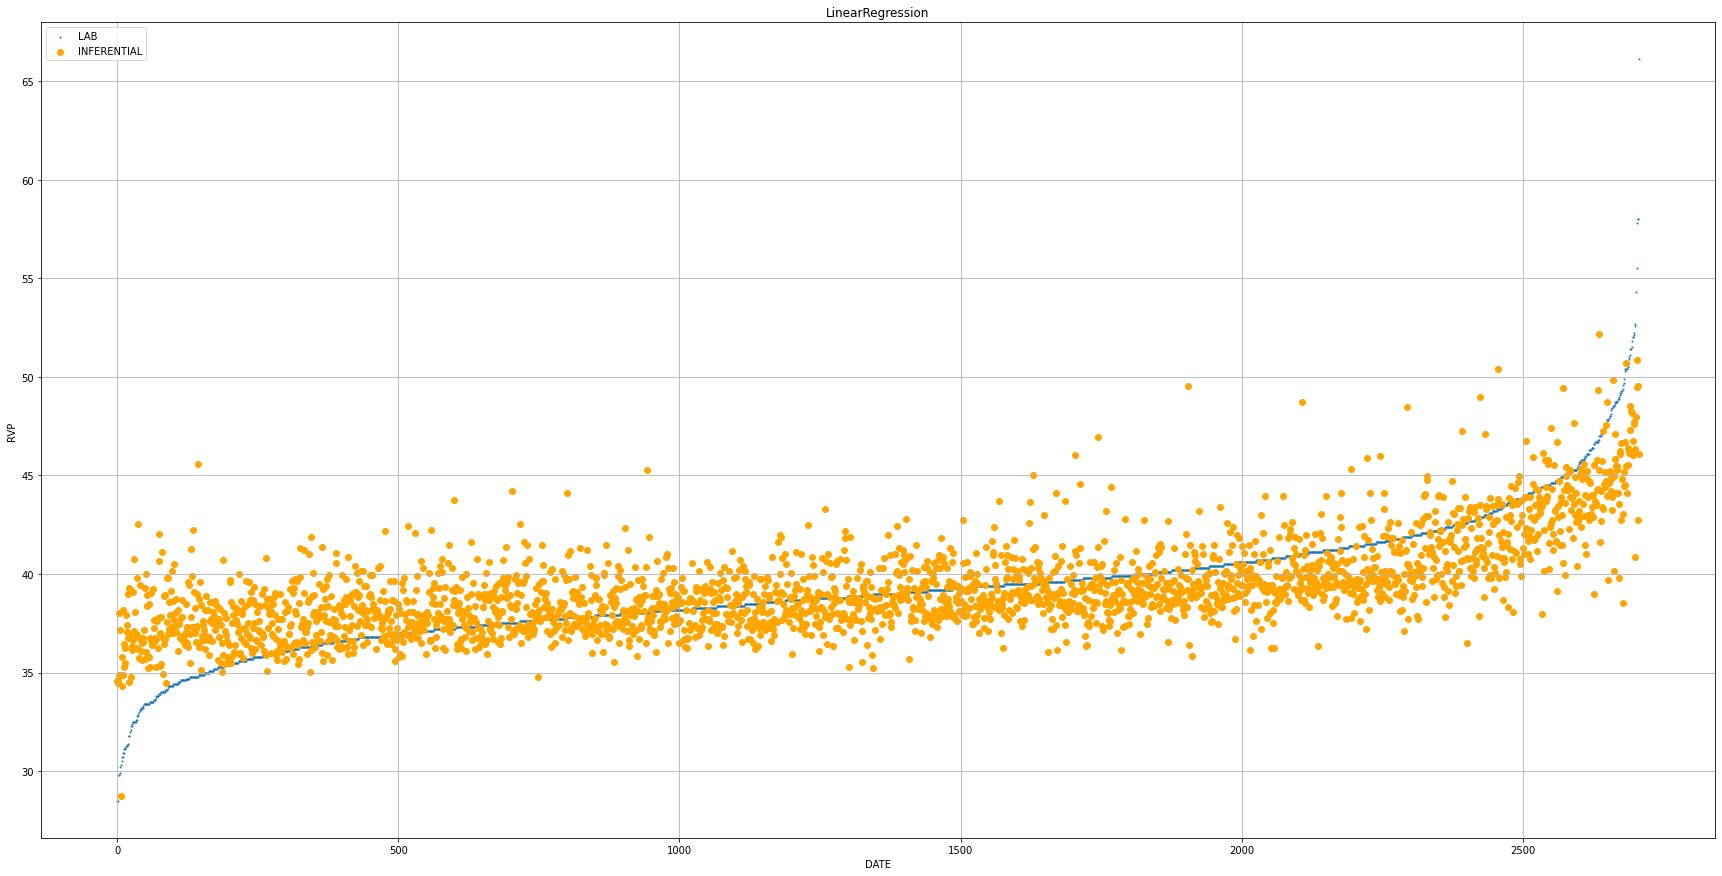

In [99]:
plt.figure(figsize = (30, 15))
plt.scatter(np.arange(length), data['RVP'], label = 'LAB', s = 1)
plt.scatter(np.arange(length), result, label = 'INFERENTIAL', color = 'orange')
plt.title('LinearRegression')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.grid()
plt.legend()
plt.show()

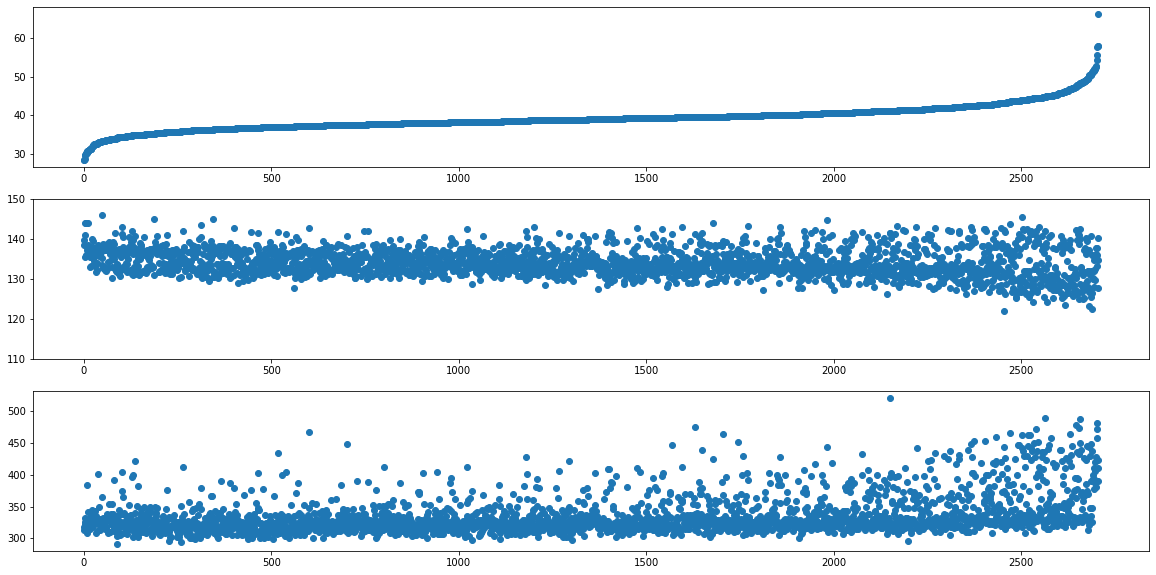

In [108]:
fig, axs = plt.subplots(3, 1, figsize = (20, 10))

axs[0].scatter(np.arange(length), data['RVP'])
axs[1].scatter(np.arange(length), data['T'])
axs[1].set_ylim([110, 150])
axs[2].scatter(np.arange(length), data['P'])
plt.show()

In [98]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr_ss = LinearRegression()
lr_ss.fit(train_scaled, train_target)
print(lr_ss.score(train_scaled, train_target))
print(lr_ss.score(test_scaled, test_target))
print(lr_ss.coef_)
print(lr_ss.intercept_)

0.5317208968504024
0.5310089998419306
[ 2398.72163168  -423.99687258 -2736.73795148   268.37331144
   293.40890974  1059.48834469  -200.82097858    52.10339964
  -114.50537629  -714.85475763   116.55771737]
39.303407224955066


In [ ]:
plt.figure(figsize = (30, 15))
plt.scatter(np.arange(length), data['RVP'], label = 'LAB', s = 1)
plt.scatter(np.arange(length), result, label = 'INFERENTIAL', color = 'orange')
plt.title('LinearRegression')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()